### Weather Data API Sample

* Access weather data using location (global), time range (1980+), and parameters (~30 weather parameters)
* Data is returned in column-wise JSON format.

-----------------

#### Step 1 - Define parameters
* Documentation available at https://docs.oikolab.com
* Sample location selected is Tamacounda, Senegal

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import json
import requests
import pandas as pd

API_KEY = 'INSERT-YOUR-API-KEY-HERE'

# See available parameters and parameter definition at https://docs.oikolab.com/#3-weather-parameters
params= {'param': ['temperature', 
                   'dewpoint_temperature', 
                   'wind_speed', 
                   'total_precipitation'],
          'start': '1980-01-01',                
          'end': '2019-12-31',
          'lat': 13.77,        # Data will be interpolated to specified lat/lon
          'lon': -13.67,
          'freq': 'D',         # 'H' for hourly, 'D' for daily data
          'api-key': API_KEY
        }

#### Step 2 - Make REST API Request & Convert to Pandas Dataframe

* Request data from OikoLab REST API end-point

In [2]:
r = requests.get('https://api.oikolab.com/weather', params=params)

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index = pd.to_datetime(weather_data['index'],unit = 's'),
                  data = weather_data['data'],
                  columns = weather_data['columns'])
df.index.name = 'datetime'

print('Processing time: %s seconds'% r.json()['attributes']['processing_time'])

Processing time: 1.66 seconds


#### Data Exploration

In [3]:
df.head()

,temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),total_precipitation (mm of water equivalent)
datetime,,,,
1980-01-01,26.99,1.38,2.84,0.0
1980-01-02,27.57,5.37,2.21,0.0
1980-01-03,26.74,5.44,2.47,0.0
1980-01-04,26.95,3.13,2.89,0.0
1980-01-05,26.87,2.20,3.02,0.0


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,12))
df['total_precipitation (mm of water equivalent)'].plot(ax=axes[0,0],
                                                        title='Daily Total Precipitation',
                                                        ylabel='mm of water equivalent')
df.groupby(df.index.month).mean()['temperature (degC)'].plot(ax=axes[0,1],
                                                            title='Monthly Mean Temperature',
                                                            ylabel='Deg C')
df.resample('Y').mean()['temperature (degC)'].plot(ax=axes[1,1],
                                                  title='Annual Mean Temperature',
                                                  ylabel='Deg C')

df['wind_speed (m/s)'].plot(ax=axes[1,0],
                            title='Average Wind Speed',
                            ylabel='meters per second')

<AxesSubplot:title={'center':'Average Wind Speed'}, xlabel='datetime', ylabel='meters per second'>

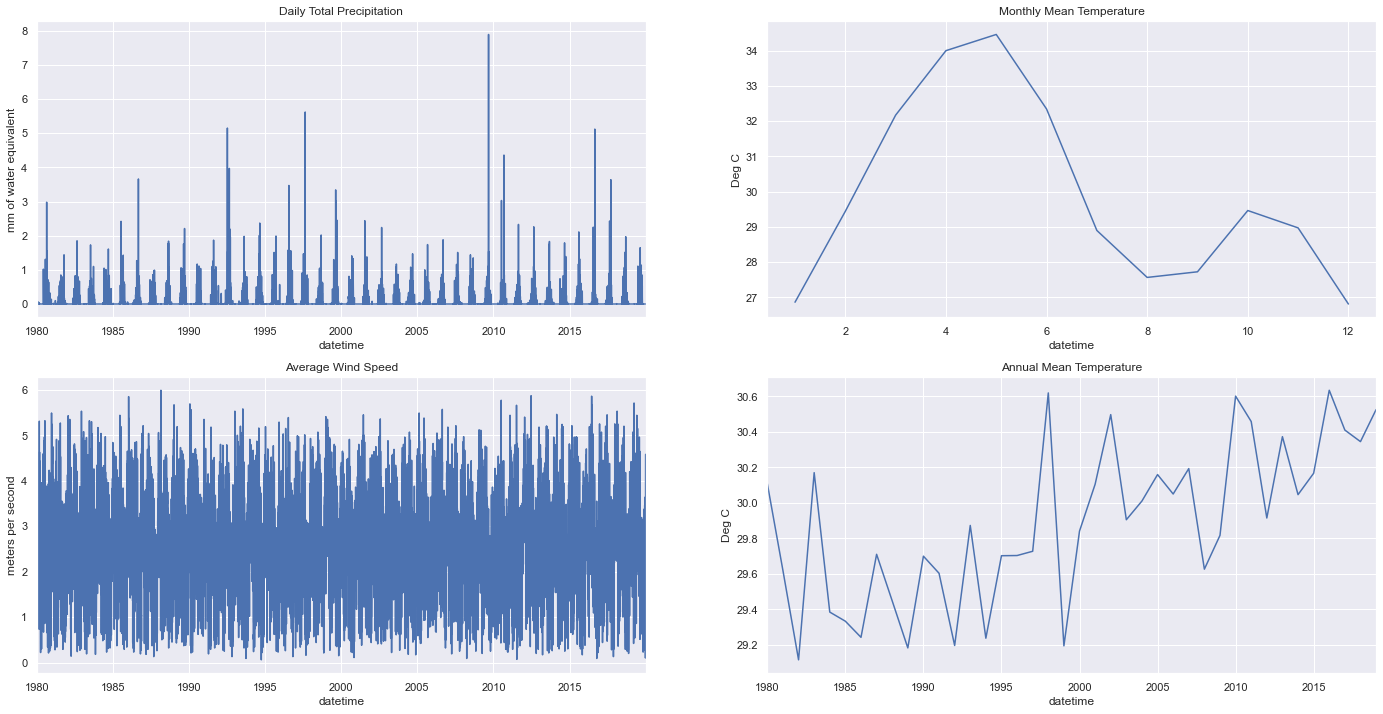